In [26]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

In [7]:
file = r'../data\energy_scan_2e008dea-7672-4704-aa48-861a9063e26a.h5'
with h5py.File(file, 'r') as f:
    imgs = np.squeeze(f['entry1']['instrument_1']['detector_1']['data'][:])
    energy = f['entry1']['instrument_1']['labview_data']['beamline_energy'][:]

imgs.shape, energy.shape

((31, 960, 2050), (31,))

In [9]:
bkgd = imgs[0].copy()
imgs -= bkgd

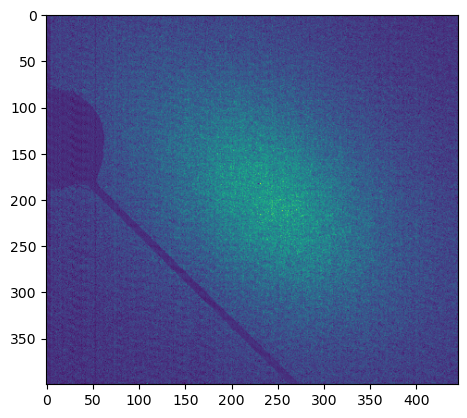

In [19]:
roi = np.s_[320:720, 1079:1524]
plt.figure()
plt.imshow(imgs[15][roi])
plt.show()

In [20]:
intensity = np.sum(imgs[(..., *roi)], axis=(1,2))

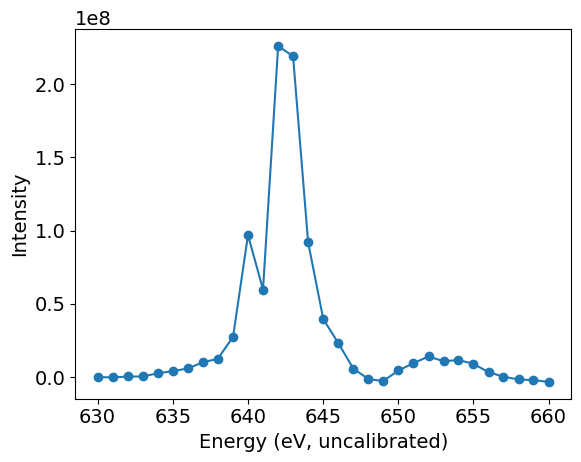

In [24]:
plt.figure()
plt.plot(energy, intensity, '-o')
plt.xlabel('Energy (eV, uncalibrated)')
plt.ylabel('Intensity')
plt.show()